<h1>SUBSET SELECTION</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns
import xlrd
import time
import statsmodels.api as sm

In [2]:
data=pd.read_excel('Data/Mini Project EFSA.xlsx')
data.rename(columns={'sex \n(0=M, 1=F)':'sex'}, inplace=True)
data

,response,number of animals,SD,dose,sex,endpoint
0,570.4,9,75.6,0,0,1
1,548.5,10,44.3,30,0,1
2,533.0,10,72.3,100,0,1
3,488.1,9,42.5,150,0,1
4,329.8,10,46.8,0,1,1
5,319.7,10,24.3,30,1,1
6,293.3,10,20.1,100,1,1
7,312.4,10,43.1,150,1,1
8,45.2,9,1.5,0,0,2
9,44.6,10,1.7,30,0,2


In [3]:
from funzioni import forward 

<h2>I dati sono le colonne originali</h2>

In [32]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

#Prepare the datas
y = data.response
weights = data.SD
X = data.drop(columns=["response","SD"])

#Devo estrarre l'endpoint dalla matrice in modo da avere 2 variabili categoriche usate per fare i 3 endpoint
endpoint1 = X['endpoint'] == 1
endpoint2 = X['endpoint'] == 2
X["endpoint1"] = endpoint1.astype("int")
X["endpoint2"] = endpoint2.astype("int")
X = X.drop(columns=["endpoint"])
#X["ones"] = np.ones((X.shape[0],1)) 

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
cols = poly.get_feature_names(X.columns)
X = pd.DataFrame(X_poly, columns=cols)

In [33]:
 X

,1,number of animals,dose,sex,endpoint1,endpoint2,number of animals^2,number of animals dose,number of animals sex,number of animals endpoint1,...,dose^2,dose sex,dose endpoint1,dose endpoint2,sex^2,sex endpoint1,sex endpoint2,endpoint1^2,endpoint1 endpoint2,endpoint2^2
0,1.0,9.0,0.0,0.0,1.0,0.0,81.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,10.0,30.0,0.0,1.0,0.0,100.0,300.0,0.0,10.0,...,900.0,0.0,30.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,10.0,100.0,0.0,1.0,0.0,100.0,1000.0,0.0,10.0,...,10000.0,0.0,100.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,9.0,150.0,0.0,1.0,0.0,81.0,1350.0,0.0,9.0,...,22500.0,0.0,150.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,10.0,0.0,1.0,1.0,0.0,100.0,0.0,10.0,10.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
5,1.0,10.0,30.0,1.0,1.0,0.0,100.0,300.0,10.0,10.0,...,900.0,30.0,30.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
6,1.0,10.0,100.0,1.0,1.0,0.0,100.0,1000.0,10.0,10.0,...,10000.0,100.0,100.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
7,1.0,10.0,150.0,1.0,1.0,0.0,100.0,1500.0,10.0,10.0,...,22500.0,150.0,150.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
8,1.0,9.0,0.0,0.0,0.0,1.0,81.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,1.0,10.0,30.0,0.0,0.0,1.0,100.0,300.0,0.0,0.0,...,900.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,1.0


<h1>2 - Use subset selection to estimate separate models for the 3 endpoints using gender as categorical variable.</h1>

<h1>3 - Use subset selection to estimate a unique model using gender and endpoint as categorical variables</h1>
<h2>Forward solo con i predittori lineari</h2>

In [34]:
models_fwd = pd.DataFrame(columns=["RSS", "model","number_of_predictors"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):
    models_fwd.loc[i] = forward(y,X,predictors,weights)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,9.317769e+05,1
1,<statsmodels.regression.linear_model.Regressio...,9.399471e+05,1
2,<statsmodels.regression.linear_model.Regressio...,1.217807e+06,1
3,<statsmodels.regression.linear_model.Regressio...,1.373098e+06,1
4,<statsmodels.regression.linear_model.Regressio...,1.199003e+05,1
5,<statsmodels.regression.linear_model.Regressio...,1.545685e+06,1
6,<statsmodels.regression.linear_model.Regressio...,9.498083e+05,1
7,<statsmodels.regression.linear_model.Regressio...,1.216940e+06,1
8,<statsmodels.regression.linear_model.Regressio...,1.373098e+06,1
9,<statsmodels.regression.linear_model.Regressio...,1.408988e+05,1


Processed  21 models on 1 predictors in 0.09105682373046875 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,104875.639375,2
1,<statsmodels.regression.linear_model.Regressio...,106205.547948,2
2,<statsmodels.regression.linear_model.Regressio...,116170.552878,2
3,<statsmodels.regression.linear_model.Regressio...,116031.181000,2
4,<statsmodels.regression.linear_model.Regressio...,104762.270000,2
5,<statsmodels.regression.linear_model.Regressio...,107469.326305,2
6,<statsmodels.regression.linear_model.Regressio...,116481.842838,2
7,<statsmodels.regression.linear_model.Regressio...,116031.181000,2
8,<statsmodels.regression.linear_model.Regressio...,90584.210000,2
9,<statsmodels.regression.linear_model.Regressio...,104800.973412,2


Processed  20 models on 2 predictors in 0.08464694023132324 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,7016.759375,3
1,<statsmodels.regression.linear_model.Regressio...,6984.140420,3
2,<statsmodels.regression.linear_model.Regressio...,18311.672878,3
3,<statsmodels.regression.linear_model.Regressio...,14495.328750,3
4,<statsmodels.regression.linear_model.Regressio...,6903.390000,3
5,<statsmodels.regression.linear_model.Regressio...,7025.517794,3
6,<statsmodels.regression.linear_model.Regressio...,18103.785353,3
7,<statsmodels.regression.linear_model.Regressio...,14495.328750,3
8,<statsmodels.regression.linear_model.Regressio...,21909.140000,3
9,<statsmodels.regression.linear_model.Regressio...,6942.093412,3


Processed  19 models on 3 predictors in 0.0827786922454834 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,4372.228750,4
1,<statsmodels.regression.linear_model.Regressio...,4343.650026,4
2,<statsmodels.regression.linear_model.Regressio...,6903.180164,4
3,<statsmodels.regression.linear_model.Regressio...,6046.575000,4
4,<statsmodels.regression.linear_model.Regressio...,4341.120232,4
5,<statsmodels.regression.linear_model.Regressio...,6899.892180,4
6,<statsmodels.regression.linear_model.Regressio...,6046.575000,4
7,<statsmodels.regression.linear_model.Regressio...,6771.140000,4
8,<statsmodels.regression.linear_model.Regressio...,6902.723333,4
9,<statsmodels.regression.linear_model.Regressio...,6882.125460,4


Processed  18 models on 4 predictors in 0.11568856239318848 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,1493.911033,5
1,<statsmodels.regression.linear_model.Regressio...,1477.124865,5
2,<statsmodels.regression.linear_model.Regressio...,3153.045492,5
3,<statsmodels.regression.linear_model.Regressio...,3168.257283,5
4,<statsmodels.regression.linear_model.Regressio...,1485.537689,5
5,<statsmodels.regression.linear_model.Regressio...,3073.060679,5
6,<statsmodels.regression.linear_model.Regressio...,3168.257283,5
7,<statsmodels.regression.linear_model.Regressio...,3956.419855,5
8,<statsmodels.regression.linear_model.Regressio...,4024.405616,5
9,<statsmodels.regression.linear_model.Regressio...,3389.893975,5


Processed  17 models on 5 predictors in 0.07180905342102051 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,1476.897927,6
1,<statsmodels.regression.linear_model.Regressio...,1463.896453,6
2,<statsmodels.regression.linear_model.Regressio...,1474.514606,6
3,<statsmodels.regression.linear_model.Regressio...,1476.897927,6
4,<statsmodels.regression.linear_model.Regressio...,1470.899478,6
5,<statsmodels.regression.linear_model.Regressio...,1474.514606,6
6,<statsmodels.regression.linear_model.Regressio...,1435.295087,6
7,<statsmodels.regression.linear_model.Regressio...,1467.789399,6
8,<statsmodels.regression.linear_model.Regressio...,1474.629607,6
9,<statsmodels.regression.linear_model.Regressio...,1423.460728,6


Processed  16 models on 6 predictors in 0.07579660415649414 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,1420.691473,7
1,<statsmodels.regression.linear_model.Regressio...,1354.319005,7
2,<statsmodels.regression.linear_model.Regressio...,1368.977188,7
3,<statsmodels.regression.linear_model.Regressio...,1420.691473,7
4,<statsmodels.regression.linear_model.Regressio...,1363.784138,7
5,<statsmodels.regression.linear_model.Regressio...,1368.977188,7
6,<statsmodels.regression.linear_model.Regressio...,1382.144701,7
7,<statsmodels.regression.linear_model.Regressio...,1399.879905,7
8,<statsmodels.regression.linear_model.Regressio...,1390.264172,7
9,<statsmodels.regression.linear_model.Regressio...,1386.969955,7


Processed  15 models on 7 predictors in 0.0658426284790039 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,1336.194420,8
1,<statsmodels.regression.linear_model.Regressio...,1198.773001,8
2,<statsmodels.regression.linear_model.Regressio...,1336.194420,8
3,<statsmodels.regression.linear_model.Regressio...,1296.535416,8
4,<statsmodels.regression.linear_model.Regressio...,1198.773001,8
5,<statsmodels.regression.linear_model.Regressio...,1316.878576,8
6,<statsmodels.regression.linear_model.Regressio...,1307.777805,8
7,<statsmodels.regression.linear_model.Regressio...,1311.504520,8
8,<statsmodels.regression.linear_model.Regressio...,1353.625635,8
9,<statsmodels.regression.linear_model.Regressio...,1198.773001,8


Processed  14 models on 8 predictors in 0.06781792640686035 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,1198.307450,9
1,<statsmodels.regression.linear_model.Regressio...,1198.773001,9
2,<statsmodels.regression.linear_model.Regressio...,1198.307450,9
3,<statsmodels.regression.linear_model.Regressio...,1181.829122,9
4,<statsmodels.regression.linear_model.Regressio...,1170.054642,9
5,<statsmodels.regression.linear_model.Regressio...,1184.488010,9
6,<statsmodels.regression.linear_model.Regressio...,1145.969270,9
7,<statsmodels.regression.linear_model.Regressio...,1198.374198,9
8,<statsmodels.regression.linear_model.Regressio...,1198.773001,9
9,<statsmodels.regression.linear_model.Regressio...,1195.148795,9


Processed  13 models on 9 predictors in 0.0608370304107666 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,1113.945613,10
1,<statsmodels.regression.linear_model.Regressio...,1145.969270,10
2,<statsmodels.regression.linear_model.Regressio...,1113.945613,10
3,<statsmodels.regression.linear_model.Regressio...,1018.757897,10
4,<statsmodels.regression.linear_model.Regressio...,1067.873460,10
5,<statsmodels.regression.linear_model.Regressio...,1144.275942,10
6,<statsmodels.regression.linear_model.Regressio...,1145.831647,10
7,<statsmodels.regression.linear_model.Regressio...,1145.969270,10
8,<statsmodels.regression.linear_model.Regressio...,1143.128040,10
9,<statsmodels.regression.linear_model.Regressio...,1145.969270,10


Processed  12 models on 10 predictors in 0.07879233360290527 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,1010.766453,11
1,<statsmodels.regression.linear_model.Regressio...,1018.757897,11
2,<statsmodels.regression.linear_model.Regressio...,1010.766453,11
3,<statsmodels.regression.linear_model.Regressio...,987.790256,11
4,<statsmodels.regression.linear_model.Regressio...,996.588839,11
5,<statsmodels.regression.linear_model.Regressio...,1018.299028,11
6,<statsmodels.regression.linear_model.Regressio...,1018.757897,11
7,<statsmodels.regression.linear_model.Regressio...,1014.982386,11
8,<statsmodels.regression.linear_model.Regressio...,1018.757897,11
9,<statsmodels.regression.linear_model.Regressio...,1018.757897,11


Processed  11 models on 11 predictors in 0.061833858489990234 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,961.492916,12
1,<statsmodels.regression.linear_model.Regressio...,987.790256,12
2,<statsmodels.regression.linear_model.Regressio...,961.492916,12
3,<statsmodels.regression.linear_model.Regressio...,976.568175,12
4,<statsmodels.regression.linear_model.Regressio...,987.250913,12
5,<statsmodels.regression.linear_model.Regressio...,987.790256,12
6,<statsmodels.regression.linear_model.Regressio...,983.826398,12
7,<statsmodels.regression.linear_model.Regressio...,987.790256,12
8,<statsmodels.regression.linear_model.Regressio...,987.790256,12
9,<statsmodels.regression.linear_model.Regressio...,987.790256,12


Processed  10 models on 12 predictors in 0.06482696533203125 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,961.492916,13
1,<statsmodels.regression.linear_model.Regressio...,961.492916,13
2,<statsmodels.regression.linear_model.Regressio...,960.192707,13
3,<statsmodels.regression.linear_model.Regressio...,961.137843,13
4,<statsmodels.regression.linear_model.Regressio...,961.492916,13
5,<statsmodels.regression.linear_model.Regressio...,957.977291,13
6,<statsmodels.regression.linear_model.Regressio...,961.492916,13
7,<statsmodels.regression.linear_model.Regressio...,961.492916,13
8,<statsmodels.regression.linear_model.Regressio...,961.492916,13


Processed  9 models on 13 predictors in 0.057847023010253906 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,957.977291,14
1,<statsmodels.regression.linear_model.Regressio...,957.977291,14
2,<statsmodels.regression.linear_model.Regressio...,957.972291,14
3,<statsmodels.regression.linear_model.Regressio...,957.622218,14
4,<statsmodels.regression.linear_model.Regressio...,957.977291,14
5,<statsmodels.regression.linear_model.Regressio...,957.977291,14
6,<statsmodels.regression.linear_model.Regressio...,957.977291,14
7,<statsmodels.regression.linear_model.Regressio...,957.977291,14


Processed  8 models on 14 predictors in 0.05285906791687012 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,957.622218,15
1,<statsmodels.regression.linear_model.Regressio...,957.622218,15
2,<statsmodels.regression.linear_model.Regressio...,957.610818,15
3,<statsmodels.regression.linear_model.Regressio...,957.622218,15
4,<statsmodels.regression.linear_model.Regressio...,957.622218,15
5,<statsmodels.regression.linear_model.Regressio...,957.622218,15
6,<statsmodels.regression.linear_model.Regressio...,957.622218,15


Processed  7 models on 15 predictors in 0.03989291191101074 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,957.610818,16
1,<statsmodels.regression.linear_model.Regressio...,957.610818,16
2,<statsmodels.regression.linear_model.Regressio...,957.610818,16
3,<statsmodels.regression.linear_model.Regressio...,957.610818,16
4,<statsmodels.regression.linear_model.Regressio...,957.610818,16
5,<statsmodels.regression.linear_model.Regressio...,957.610818,16


Processed  6 models on 16 predictors in 0.03390979766845703 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,957.610818,17
1,<statsmodels.regression.linear_model.Regressio...,957.610818,17
2,<statsmodels.regression.linear_model.Regressio...,957.610818,17
3,<statsmodels.regression.linear_model.Regressio...,957.610818,17
4,<statsmodels.regression.linear_model.Regressio...,957.610818,17


Processed  5 models on 17 predictors in 0.0329136848449707 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,957.610818,18
1,<statsmodels.regression.linear_model.Regressio...,957.610818,18
2,<statsmodels.regression.linear_model.Regressio...,957.610818,18
3,<statsmodels.regression.linear_model.Regressio...,957.610818,18


Processed  4 models on 18 predictors in 0.03291177749633789 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,957.610818,19
1,<statsmodels.regression.linear_model.Regressio...,957.610818,19
2,<statsmodels.regression.linear_model.Regressio...,957.610818,19


Processed  3 models on 19 predictors in 0.024933576583862305 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,957.610818,20
1,<statsmodels.regression.linear_model.Regressio...,957.610818,20


Processed  2 models on 20 predictors in 0.01695537567138672 seconds.


,model,RSS,number_of_predictors
0,<statsmodels.regression.linear_model.Regressio...,957.610818,21


Processed  1 models on 21 predictors in 0.012965679168701172 seconds.
Total elapsed time: 1.3735020160675049 seconds.


In [35]:
display(models_fwd)

,RSS,model,number_of_predictors
1,119900.270000,<statsmodels.regression.linear_model.Regressio...,1
2,22041.390000,<statsmodels.regression.linear_model.Regressio...,2
3,6903.390000,<statsmodels.regression.linear_model.Regressio...,3
4,4025.072283,<statsmodels.regression.linear_model.Regressio...,4
5,1477.124865,<statsmodels.regression.linear_model.Regressio...,5
6,1423.460728,<statsmodels.regression.linear_model.Regressio...,6
7,1354.319005,<statsmodels.regression.linear_model.Regressio...,7
8,1198.773001,<statsmodels.regression.linear_model.Regressio...,8
9,1145.969270,<statsmodels.regression.linear_model.Regressio...,9
10,1018.757897,<statsmodels.regression.linear_model.Regressio...,10


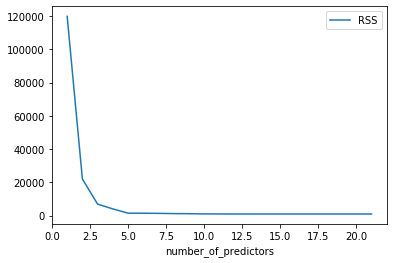

In [36]:
models_fwd.plot(x='number_of_predictors', y='RSS')

In [37]:
 for i in range(0,models_fwd.shape[0]):
    print(models_fwd.iloc[i]["model"].model.exog_names)
    print()


['endpoint1']

['endpoint1', 'sex endpoint1']

['endpoint1', 'sex endpoint1', 'endpoint2']

['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1']

['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'number of animals']

['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'number of animals', 'dose sex']

['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'number of animals', 'dose sex', 'dose']

['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'number of animals', 'dose sex', 'dose', 'number of animals sex']

['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'number of animals', 'dose sex', 'dose', 'number of animals sex', 'dose^2']

['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'number of animals', 'dose sex', 'dose', 'number of animals sex', 'dose^2', 'number of animals dose']

['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'number of animals', 'dose sex', 'dose', 'number of animals sex', 

In [77]:
res = models_fwd.iloc[5]["model"].model.fit()

In [7]: print(res.summary())

                            WLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.926
Model:                            WLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     45.36
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.40e-09
Time:                        17:08:09   Log-Likelihood:                -129.54
No. Observations:                  24   AIC:                             271.1
Df Residuals:                      18   BIC:                             278.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
endpoint1           406.6125     30.84

<h2>Confrontiamo ora questi modelli con criteri oggettivi</h2>

In [38]:
for i in range(1, models_fwd.shape[0]):
    model = models_fwd.loc[i,"model"]
    models_fwd.loc[i,"aic"] = model.aic
    models_fwd.loc[i,"bic"] = model.bic
    models_fwd.loc[i,"mse"] = model.mse_total
    models_fwd.loc[i,"adj_rsquare"] = model.rsquared_adj
    

In [39]:
models_fwd

,RSS,model,number_of_predictors,aic,bic,mse,adj_rsquare
1,119900.270000,<statsmodels.regression.linear_model.Regressio...,1,274.501732,275.679786,65034.297917,0.919841
2,22041.390000,<statsmodels.regression.linear_model.Regressio...,2,235.852014,238.208121,65034.297917,0.984595
3,6903.390000,<statsmodels.regression.linear_model.Regressio...,3,209.990187,213.524348,65034.297917,0.994945
4,4025.072283,<statsmodels.regression.linear_model.Regressio...,4,199.042913,203.755129,65034.297917,0.996905
5,1477.124865,<statsmodels.regression.linear_model.Regressio...,5,176.984225,182.874494,65034.297917,0.998805
6,1423.460728,<statsmodels.regression.linear_model.Regressio...,6,178.096069,185.164392,65034.297917,0.998784
7,1354.319005,<statsmodels.regression.linear_model.Regressio...,7,178.901054,187.147431,65034.297917,0.998775
8,1198.773001,<statsmodels.regression.linear_model.Regressio...,8,177.973049,187.397480,65034.297917,0.998848
9,1145.969270,<statsmodels.regression.linear_model.Regressio...,9,178.891904,189.494388,65034.297917,0.998825
10,1018.757897,<statsmodels.regression.linear_model.Regressio...,10,178.067904,189.848442,65034.297917,0.998881


In [40]:
#Quelli da minimizzare
for criteria in ["bic","aic"]:
    print("The criteria is: " + criteria)
    row = models_fwd.loc[models_fwd[criteria].argmin()]
    modelFeatures = row["model"].model.exog_names
    if "intercept" not in modelFeatures:
        modelFeatures.append("intercept")
    criteriaValue = row[criteria]
    degressOfFreedom = row["model"].model.df_model
    print("Features: "+str(modelFeatures))
    print("Criteria value: "+str(criteriaValue))
    print("Degrees of freedom: "+str(degressOfFreedom+1))
    print()
    
    
#Quelli da massimizzare
for criteria in ["adj_rsquare"]:
    print("The criteria is: " + criteria)
    row = models_fwd.loc[models_fwd[criteria].argmax()]
    modelFeatures = row["model"].model.exog_names
    if "intercept" not in modelFeatures:
        modelFeatures.append("intercept")
    criteriaValue = row[criteria]
    degressOfFreedom = row["model"].model.df_model
    print("Features: "+str(modelFeatures))
    print("Criteria value: "+str(criteriaValue))
    print("Degrees of freedom: "+str(degressOfFreedom+1))
    print()

    

The criteria is: bic
Features: ['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'intercept']
Criteria value: 203.75512854134968
Degrees of freedom: 5.0

The criteria is: aic
Features: ['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'intercept']
Criteria value: 199.04291321995788
Degrees of freedom: 5.0

The criteria is: adj_rsquare
Features: ['endpoint1', 'sex endpoint1', 'endpoint2', 'dose endpoint1', 'number of animals', 'dose sex', 'dose', 'number of animals sex', 'dose^2', 'intercept']
Criteria value: 0.998825266762616
Degrees of freedom: 10.0



In [15]:
from funzioni import CarloCrecco 
CarloCrecco()

Cuina!
